###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.
Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.
Hint : search for obtaining regression line using numpy.

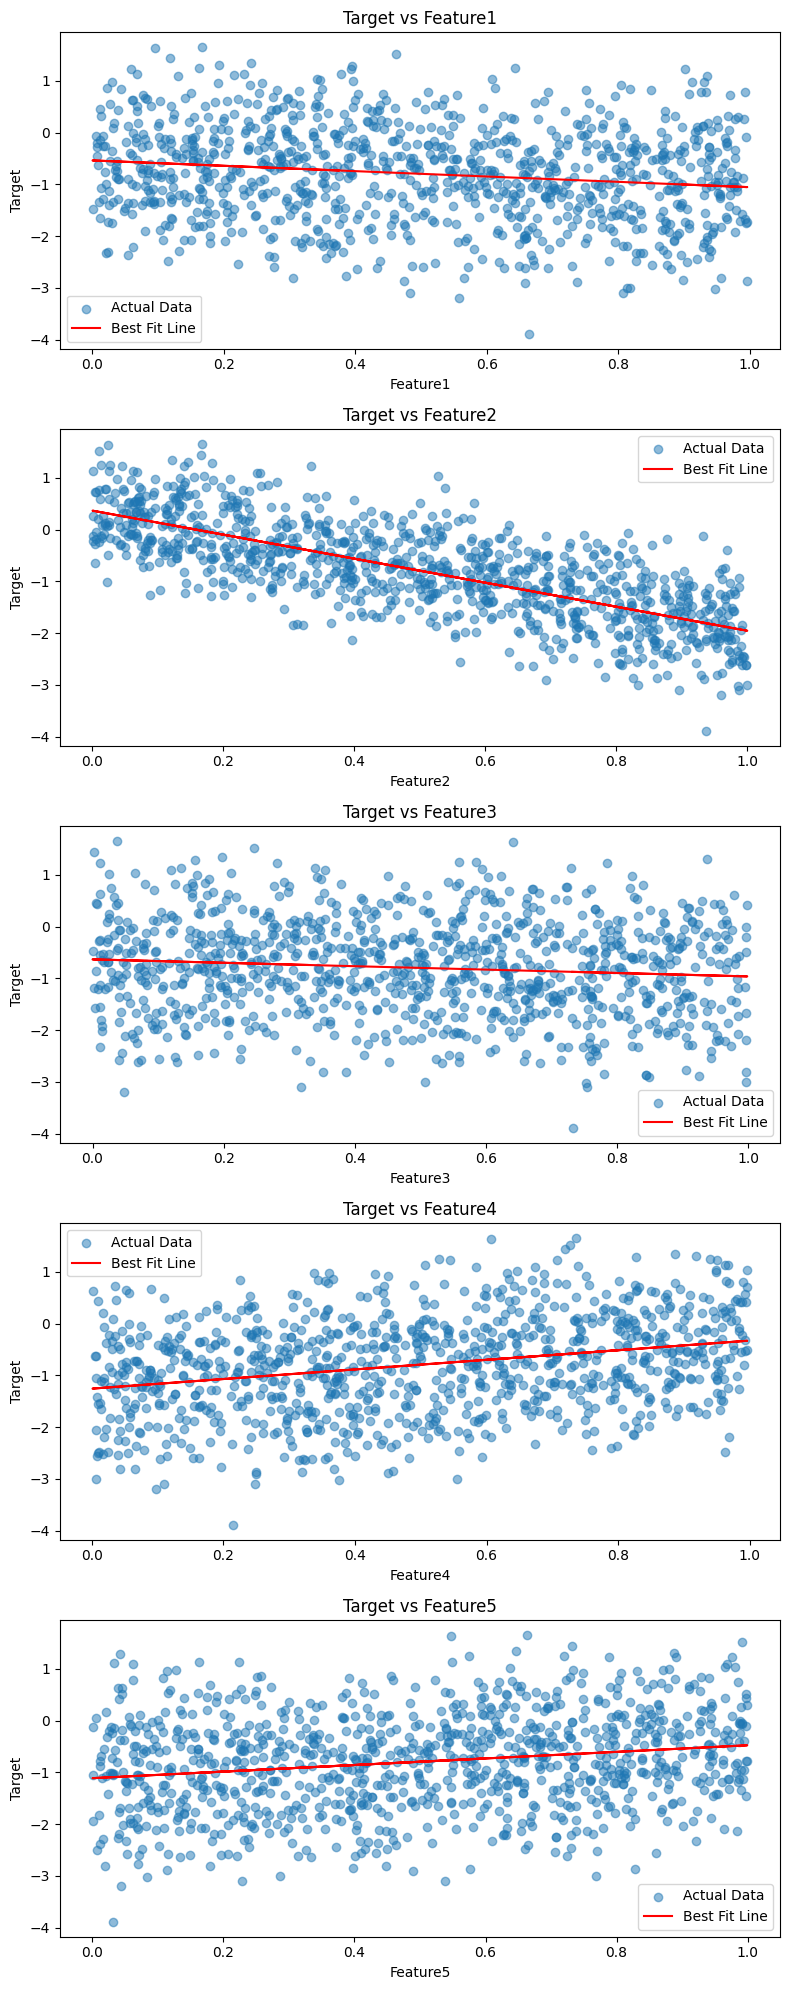

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.random.seed(42)
n_samples=1000
n_features=5
X=np.random.rand(n_samples,n_features)
weights=np.random.randn(n_features)
intercept=np.random.rand()
y=np.dot(X,weights)+intercept+np.random.randn(n_samples)*0.5
fig,axs = plt.subplots(n_features,1,figsize=(8,20))
for i in range(n_features):
    feature = X[:,i]
    feature = feature.reshape(-1,1)
    model=LinearRegression().fit(feature,y)
    y_pred=model.predict(feature)
    axs[i].scatter(feature,y,alpha=0.5,label="Actual Data")
    axs[i].plot(feature,y_pred,color="r",label="Best Fit Line")
    axs[i].set_xlabel(f"Feature{i+1}")
    axs[i].set_ylabel("Target")
    axs[i].set_title(f"Target vs Feature{i+1}")
    axs[i].legend()
plt.tight_layout()
plt.show()


### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

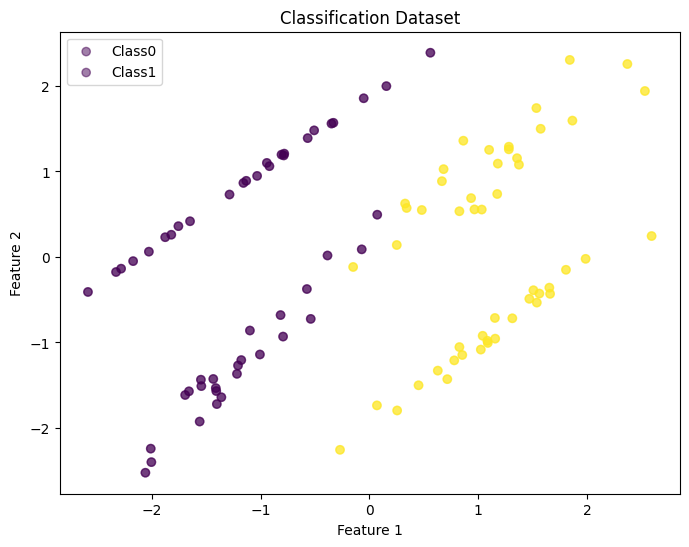

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
np.random.seed(42)
n_samples = 1000  
n_features = 2  
n_classes = 2  
clusters_per_class = 2  
X, y = make_classification(n_features=2,n_clusters_per_class=2,n_classes=2,random_state=42,n_redundant=0)
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.scatter(X[:, 0], X[:, 1],c=y, label = f"Class{i}",alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Dataset')
plt.legend()
plt.show()

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

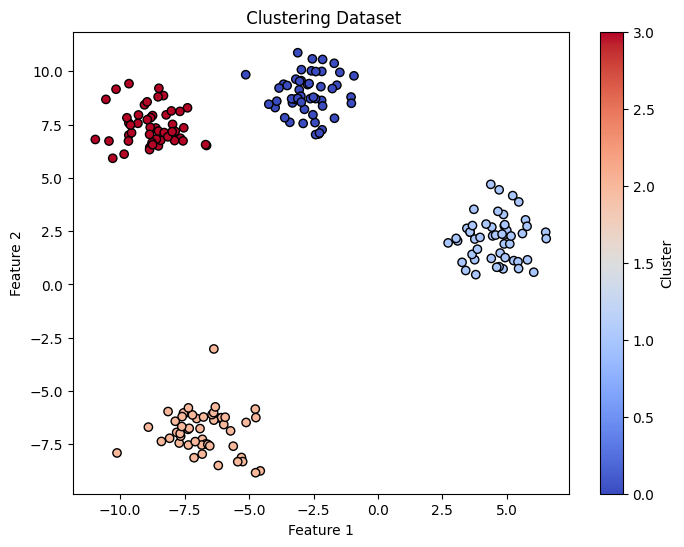

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
np.random.seed(42)

X, y = make_blobs(n_samples=200,n_features =2,centers=4, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title(' Clustering Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

url = "https://www.worldometers.info/coronavirus/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', {'id': 'main_table_countries_today'})

headers = []
for th in table.find_all('th'):
    headers.append(th.text.strip())

data = {header: [] for header in headers}

for row in table.find_all('tr')[1:]: 
    for idx, td in enumerate(row.find_all('td')):
        data[headers[idx]].append(td.text.strip())

df = pd.DataFrame(data)

column_mapping = {
    "Country,Other": "Country",
    "Continent": "Continent",
    "Population": "Population",
    "TotalCases": "TotalCases",
    "NewCases": "NewCases",
    "TotalDeaths": "TotalDeaths",
    "NewDeaths": "NewDeaths",
    "TotalRecovered": "TotalRecovered",
    "NewRecovered": "NewRecovered",
    "ActiveCases": "ActiveCases"
}
df = df.rename(columns=column_mapping)

print(df.head())

  #        Country   TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
0    North America  131,889,132            1,695,941              127,665,129   
1             Asia  221,500,265            1,553,662              205,673,091   
2           Europe  253,406,198            2,101,824              248,754,104   
3    South America   70,200,879            1,367,332               66,683,585   
4          Oceania   14,895,771               33,015               14,752,388   

  NewRecovered ActiveCases Serious,Critical  ... TotalTests Tests/\n1M pop  \
0         +350   2,528,062            6,095  ...                             
1               14,273,512           14,733  ...                             
2         +474   2,550,270            4,453  ...                             
3                2,149,962            8,953  ...                             
4                  110,368               31  ...                             

  Population          Continent 1 Caseevery 

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

Original class distribution: Counter({0: 945, 1: 55})


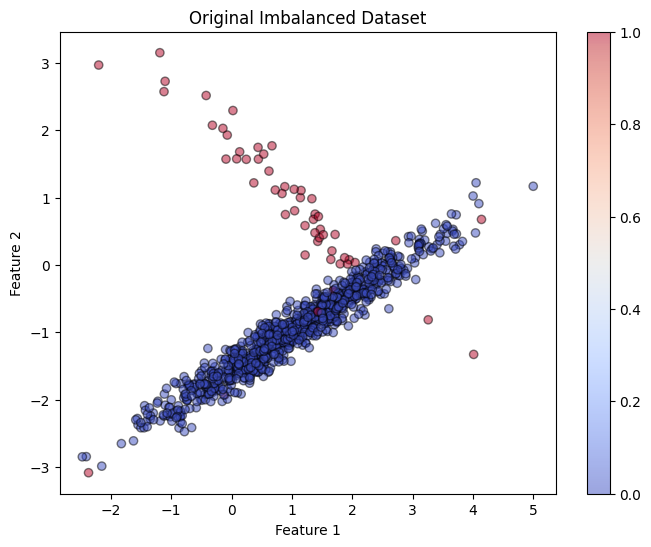

Resampled class distribution (after SMOTE): Counter({0: 945, 1: 236})


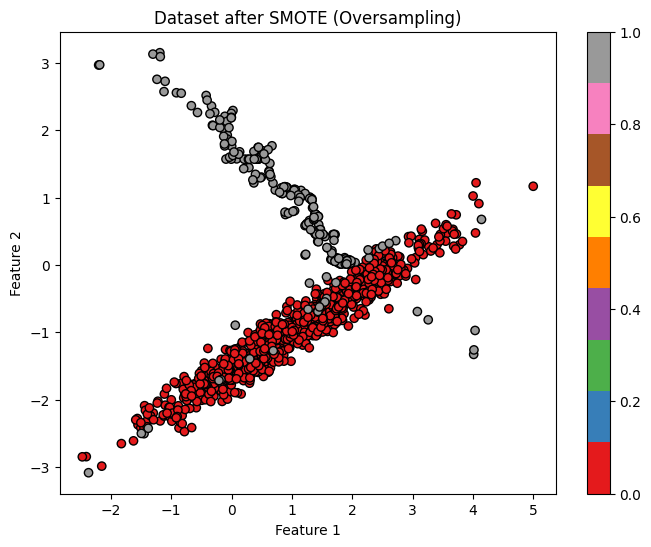

Undersampled class distribution (after RandomUnderSampler): Counter({0: 314, 1: 236})


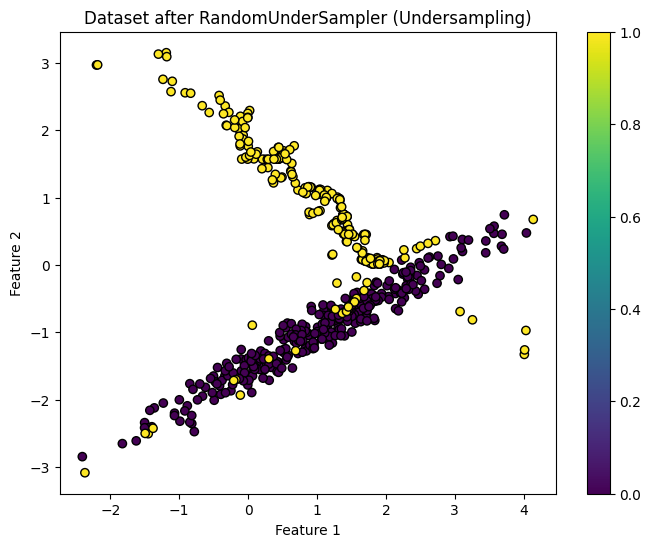

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
X, y = make_classification(n_samples=1000,n_features=2,n_classes =2,n_informative=2,n_redundant=0,n_clusters_per_class=1,weights=[0.95, 0.05],random_state=42)
original_class_distribution = Counter(y)
print("Original class distribution:", original_class_distribution)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', edgecolors='k',alpha =0.5)
plt.title("Original Imbalanced Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()
smote = SMOTE(sampling_strategy=0.25, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
resampled_class_distribution = Counter(y_resampled)
print("Resampled class distribution (after SMOTE):", resampled_class_distribution)
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap='Set1', marker='o', edgecolors='k')
plt.title("Dataset after SMOTE (Oversampling)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()
undersampler = RandomUnderSampler(sampling_strategy=0.75, random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_resampled, y_resampled)
undersampled_class_distribution = Counter(y_undersampled)
print("Undersampled class distribution (after RandomUnderSampler):", undersampled_class_distribution)
plt.figure(figsize=(8, 6))
plt.scatter(X_undersampled[:, 0], X_undersampled[:, 1], c=y_undersampled, cmap='viridis', marker='o', edgecolors='k')
plt.title("Dataset after RandomUnderSampler (Undersampling)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar()
plt.show()


##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


iris_data = load_iris()


X = iris_data.data
y = iris_data.target
feature_names = iris_data.feature_names
df = pd.DataFrame(X, columns=feature_names)


print("First 5 rows of the DataFrame:")
print(df.head())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f"Training set dimensions: X_train - {X_train.shape}, y_train - {y_train.shape}")
print(f"Testing set dimensions: X_test - {X_test.shape}, y_test - {y_test.shape}")


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


df_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
print("\nFirst 5 rows of the standardized training set:")
print(df_train_scaled.head())


First 5 rows of the DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Training set dimensions: X_train - (105, 4), y_train - (105,)
Testing set dimensions: X_test - (45, 4), y_test - (45,)

First 5 rows of the standardized training set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1           0.551222         -0.502563           0.717703          0.353032
2           0.671802          0.217016           0.951192          0.758890
3           0.912961         -0.022844    